In [ ]:
import numpy as np
import plotly.graph_objects as go

from finmc.calc.iv import iv_surface_sim
from finmc.models.heston import HestonMC
from finmc.utils.assets import flat_discount, flat_fwds

In [ ]:
asset_name = "SPX"
spot = 2900
rate = 0.02

dataset = {
    "MC": {
        "PATHS": 100_000,
        "TIMESTEP": 1 / 250,
        "SEED": 1,
    },
    "BASE": "USD",
    "ASSETS": {
        "USD": flat_discount(rate, 3.0),
        asset_name: flat_fwds(spot, rate, 0.0, 3.0),
    },
    "HESTON": {
        "ASSET": asset_name,
        "INITIAL_VAR": 0.02,
        "LONG_VAR": 0.04,
        "VOL_OF_VOL": 0.45,
        "MEANREV": 1.5,
        "CORRELATION": -0.85,
    },
}

In [ ]:
# create the model and calculate the implied volatility surface
model = HestonMC(dataset)
strikes = np.linspace(2000, 3400, 15)
expirations = np.array([1 / 12, 1 / 6, 1 / 4, 1 / 2, 1])
surface = iv_surface_sim(
    strikes,
    expirations,
    asset_name="SPX",
    model=model,
)
print(surface)

[[       nan        nan        nan        nan        nan 0.20937343
  0.19402772 0.17845643 0.16145163 0.14235281 0.11938727 0.13614106
         nan        nan        nan]
 [       nan        nan        nan 0.23437152 0.21995696 0.20684742
  0.19329561 0.17838198 0.16197742 0.1431124  0.12157429 0.10145463
         nan        nan        nan]
 [       nan 0.25854712 0.24280154 0.23082806 0.21879263 0.20610839
  0.19242741 0.1779924  0.1621526  0.14454121 0.12492617 0.10583825
  0.12330433        nan        nan]
 [0.26295225 0.25130651 0.2396193  0.22777248 0.21573302 0.20349283
  0.19098531 0.17788313 0.1639923  0.14930977 0.13389857 0.11845363
  0.10498153 0.11459689 0.12536332]
 [0.24793013 0.23794657 0.22810393 0.2182011  0.2081981  0.19819715
  0.18807408 0.17786013 0.16746765 0.15695584 0.14632223 0.13572403
  0.12536401 0.11573023 0.10782922]]


C:\Users\somdi\AppData\Local\Temp\ipykernel_14932\3464493505.py:4: UserWarning: The following kwargs were not used by contour: 'linewidth'
  surf = ax.contourf(strikes, expirations, surface, #cmap=cm.coolwarm,


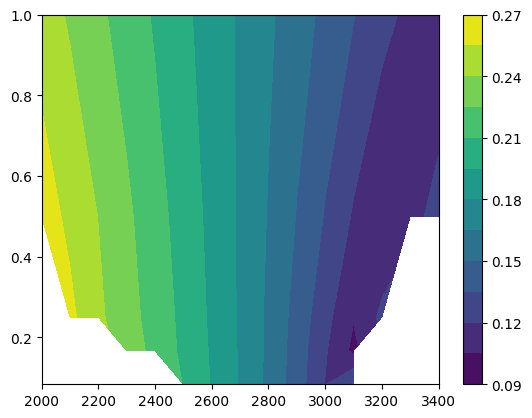

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
surf = ax.contourf(
    strikes,
    expirations,
    surface,
    antialiased=False,
    levels=10,
)
cbar = ax.figure.colorbar(surf, ax=ax)

plt.show()

((5, 15), (5, 15), (5, 15))

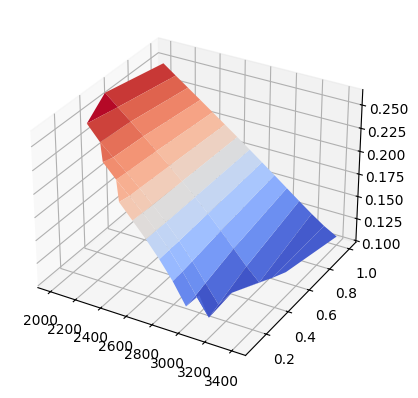

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm

X, Y = np.meshgrid(strikes, expirations)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(
    X,
    Y,
    surface,
    cmap=cm.coolwarm,
)
(X.shape, Y.shape, surface.shape)

In [ ]:
# Create the surface plot
fig = go.Figure(
    go.Surface(
        z=surface,
        x=strikes,
        y=expirations,
    )
)

# Update layout for better visualization
fig.update_layout(
    scene=dict(
        xaxis_title="K",
        yaxis_title="Expirations",
        zaxis_title="Implied Vol",
        zaxis=dict(tickformat=".0%"),
    ),
    autosize=False,
    margin=dict(l=20, r=20, b=20, t=20),
)

In [ ]:
fig = go.Figure()

# Add a line plot for each expiration
for i, expiration in enumerate(expirations):
    fig.add_trace(
        go.Scatter(
            x=strikes,
            y=surface[i, :],
            mode="lines",
            name=f"{expiration:0.2f}yr",
        )
    )

# Update layout for better visualization
fig.update_layout(
    xaxis_title="Strike Price (K)",
    yaxis=dict(title="Implied Volatility", tickformat=".0%"),
    autosize=False,
    legend_x=0.7,
    legend_y=0.98,
    margin=dict(l=65, r=50, b=65, t=10),
)

fig.show()